<a href="https://colab.research.google.com/github/satwiksps/Quantum_Computing/blob/main/6_Grover's_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grover's Algorithm
Grover’s algorithm is ideal for searching an unstructured database. While a classical computer would require 𝑂(𝑁) operations to find the item, Grover's Algorithm can do it in O(√N) operations offering a quadratic speedup.

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.0 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4964f8e623d4589022d0a366880eeec42578704e84f8408c074d8863ae27e983
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Function to create the oracle for Grover's Algorithm
def grover_oracle(qc):
    qc.cz(0, 1)

qc = QuantumCircuit(2, 2) # Create a Quantum Circuit with 2 qubits and 2 classical bits
qc.h([0, 1]) # Apply Hadamard gates to put qubits into superposition
grover_oracle(qc) # Apply the Grover oracle
qc.h([0, 1]) # Apply Hadamard gates again
qc.measure([0, 1], [0, 1]) # Measure the qubits

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

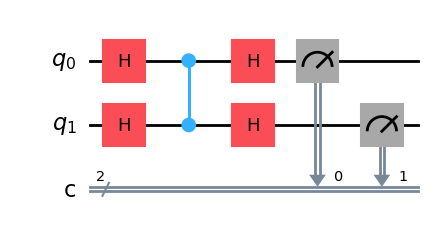

In [ ]:
#Visualise the circuit
qc.draw('mpl')

Counts: {'01': 253, '00': 239, '10': 275, '11': 257}


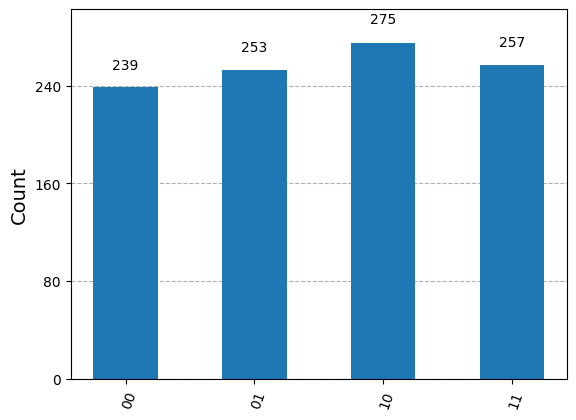

In [ ]:
counts = result.get_counts() # Get the counts of outcomes
print("Counts:", counts)
# Visualize the results
plot_histogram(counts)